In [1]:
import warnings
warnings.filterwarnings('ignore')



In [2]:
#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [4]:
data = pd.read_csv('~/Desktop/new battery operation.csv',parse_dates = True)


In [5]:
data=data.drop(data.index[0])
data['Data Type:']=pd.to_datetime(data['Data Type:'])
data=data.set_index("Data Type:")

In [6]:
data = data[0:].convert_objects(convert_numeric=True)
data=data.drop(columns=['Charge','Discharge'])

In [7]:
data.head(10)

,PoolPrices
Data Type:,
2030-07-11 01:00:00,122.450901
2030-07-11 03:00:00,93.593407
2030-07-11 05:00:00,96.786852
2030-07-11 07:00:00,113.210955
2030-07-11 09:00:00,110.444023
2030-07-11 11:00:00,92.062270
2030-07-11 13:00:00,91.792703
2030-07-11 15:00:00,96.069013
2030-07-11 17:00:00,119.037182


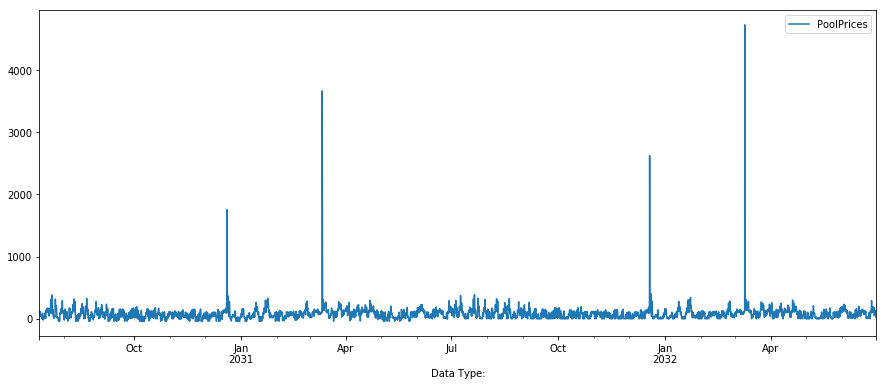

In [8]:
data.plot(figsize=(15, 6))
plt.show()

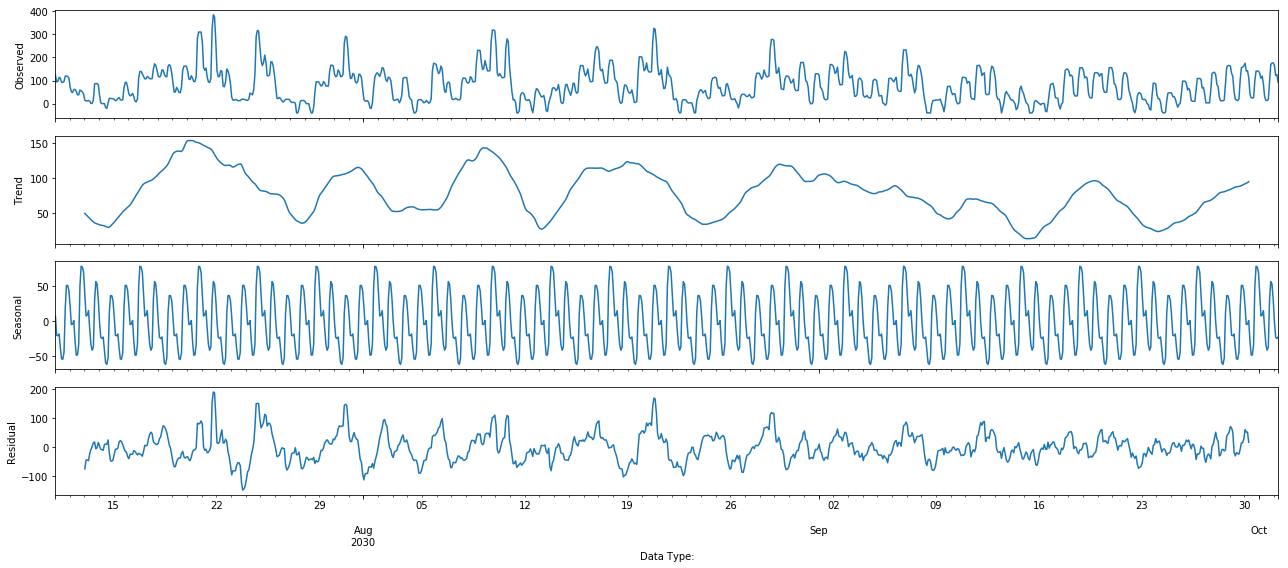

In [9]:
import statsmodels.api as sm
from pylab import rcParams
small = data[:1000]
rcParams['figure.figsize'] = 18, 8
decomfreq=24*60/30
decomfreq=int(decomfreq)
decomposition = sm.tsa.seasonal_decompose(small,freq=int(decomfreq))
fig = decomposition.plot()
plt.show()

In [10]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:109764.50473969514
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:107966.6845577658
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:107218.83408941247
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:109460.61912898137
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:105342.3794538934
ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:104957.29609451833
ARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:118385.5386644425
ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:109251.30665172095
ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:109941.18173149523
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:107038.81736346358
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:105477.46824928652
ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:105097.71751601175
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:107566.38701485746
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:105056.22217116482
ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:104890.70210624461
ARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:113797.59828694575
ARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:107495.18439318087
ARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:107431.9735650275
ARIMA(0, 0, 0)x(2, 0, 0, 12) - A

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 2, 2, 12) - AIC:98026.93661171541
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:99719.09743305974
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:98274.52938947061
ARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:97985.4914916014
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:100640.16832760001
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:97960.7648129984
ARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:97813.47349125383
ARIMA(0, 0, 1)x(1, 2, 0, 12) - AIC:106986.88670189373
ARIMA(0, 0, 1)x(1, 2, 1, 12) - AIC:100568.16196945027


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 2, 2, 12) - AIC:100223.71516465564
ARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:99183.96484817247


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:97992.6036313011


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:99698.10396223047
ARIMA(0, 0, 1)x(2, 1, 0, 12) - AIC:99736.66885188811
ARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:97836.14457351808
ARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:97815.09803977853
ARIMA(0, 0, 1)x(2, 2, 0, 12) - AIC:104631.15523749652
ARIMA(0, 0, 1)x(2, 2, 1, 12) - AIC:99688.45376843729


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 2, 2, 12) - AIC:104569.36526408039
ARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:97819.14393887871
ARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:97136.31714735857
ARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:96765.79906908372
ARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC:100607.21869644613
ARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:95509.02643956806
ARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:95329.89889238979
ARIMA(0, 0, 2)x(0, 2, 0, 12) - AIC:109788.34607205099
ARIMA(0, 0, 2)x(0, 2, 1, 12) - AIC:100422.32394068973


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(0, 2, 2, 12) - AIC:95402.60606375037
ARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:96949.13025156327


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:95634.48765726673
ARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:95457.96808899847
ARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC:98347.74488232861
ARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:95447.36770760686


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:95334.53941084039
ARIMA(0, 0, 2)x(1, 2, 0, 12) - AIC:104884.65507419036
ARIMA(0, 0, 2)x(1, 2, 1, 12) - AIC:98267.78920960074


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 2, 2, 12) - AIC:102790.53111876576
ARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:96518.72840078227


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:95712.49733384834


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:95467.66371960485
ARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:97347.73617297475
ARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:95341.2360641258


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:95310.6486054422
ARIMA(0, 0, 2)x(2, 2, 0, 12) - AIC:102398.9905096607
ARIMA(0, 0, 2)x(2, 2, 1, 12) - AIC:97302.81528664395


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 2, 2, 12) - AIC:102659.403090805
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:99534.96438589558
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:99341.48537231122
ARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:99178.13451318251
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:104529.9532502207
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:98747.72391925212


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:98616.10116355849
ARIMA(0, 1, 0)x(0, 2, 0, 12) - AIC:113828.929392159
ARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:104335.27440133349
ARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC:98670.87375023287
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:99341.98860513736
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:98897.33678628506
ARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:98765.91538492199
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:102014.8030283047
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:98742.50530947375
ARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:98619.40316756601
ARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:108697.87383589172
ARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:101952.7326131887
ARIMA(0, 1, 0)x(1, 2, 2, 12) - AIC:100717.90815807934
ARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:99171.54985617801
ARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:98774.0095310545
ARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:98751.3453078201
ARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:100920.16482473543


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:98627.29423928495
ARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:98617.65121522134
ARIMA(0, 1, 0)x(2, 2, 0, 12) - AIC:106135.46731042166
ARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC:100870.15775693
ARIMA(0, 1, 0)x(2, 2, 2, 12) - AIC:100085.39496601431
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:97964.17951674847
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:97797.29818892373
ARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:97646.76883065315
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:103143.00975066668
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:97301.85968811372
ARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:97175.34683614982
ARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:112461.63697716926
ARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:102951.75628146945
ARIMA(0, 1, 1)x(0, 2, 2, 12) - AIC:97223.95446053533
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:97812.4726409075


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:97433.96298207267
ARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:97364.19977141712
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:100603.92085105627
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:97299.73294222611
ARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:97177.30104939341
ARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:107320.93494229243
ARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:100532.56661090879


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 2, 2, 12) - AIC:98417.86297203392
ARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:97656.57950975167
ARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:97385.30160319616
ARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:97375.08569950523
ARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:99485.69450001618
ARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:97196.81086177134
ARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:97176.6472896194
ARIMA(0, 1, 1)x(2, 2, 0, 12) - AIC:104734.47768177059
ARIMA(0, 1, 1)x(2, 2, 1, 12) - AIC:99437.81257398723


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 2, 2, 12) - AIC:105595.8166042008
ARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:97588.80221310766
ARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:97368.38714035183
ARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:97196.67900884336
ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:102349.35902793385
ARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:96717.61375477457
ARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:96579.0697172455
ARIMA(0, 1, 2)x(0, 2, 0, 12) - AIC:111611.82009187686


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 2, 1, 12) - AIC:102429.60755306878


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 2, 2, 12) - AIC:104280.10627884243
ARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:97382.46087057736
ARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:96878.70264754632


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:96739.70484973086
ARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:99917.94568720761
ARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:96703.27534972457
ARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:96580.68372016074
ARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:106579.77621942632
ARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:99836.37230437282


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:104524.48808426576
ARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:97200.51295677735
ARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:96770.7581996055


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:96715.40993265621
ARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:98833.55909172853
ARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:96608.81754096042


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:96579.09968591717
ARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:104023.654413424
ARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:98786.64014876494


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:104344.00902790866
ARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:102931.1459627627
ARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:102778.38340353266
ARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:102631.89632060107
ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:108301.19563555777
ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:102345.99621393792
ARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:102215.7418132898
ARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:117627.90872889647
ARIMA(0, 2, 0)x(0, 2, 1, 12) - AIC:108096.03174373355
ARIMA(0, 2, 0)x(0, 2, 2, 12) - AIC:102261.50654791328
ARIMA(0, 2, 0)x(1, 0, 0, 12) - AIC:102787.01748314018
ARIMA(0, 2, 0)x(1, 0, 1, 12) - AIC:102494.02358536
ARIMA(0, 2, 0)x(1, 0, 2, 12) - AIC:102364.02916981159
ARIMA(0, 2, 0)x(1, 1, 0, 12) - AIC:105714.6972523779
ARIMA(0, 2, 0)x(1, 1, 1, 12) - AIC:102347.05278248234
ARIMA(0, 2, 0)x(1, 1, 2, 12) - AIC:102216.21131435625
ARIMA(0, 2, 0)x(1, 2, 0, 12) - AIC:112441.24172885128
ARIMA(0, 2, 0)x(1, 2, 1, 12) - AIC:105646.59595086197
ARIMA(0, 2, 0)x(1, 2, 2, 12) - AIC

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 2, 0, 12) - AIC:109847.1808316534
ARIMA(0, 2, 0)x(2, 2, 1, 12) - AIC:104523.8806758962


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 2, 2, 12) - AIC:104084.40674684987
ARIMA(0, 2, 1)x(0, 0, 0, 12) - AIC:99523.8728836094
ARIMA(0, 2, 1)x(0, 0, 1, 12) - AIC:99330.25843885157
ARIMA(0, 2, 1)x(0, 0, 2, 12) - AIC:99166.81769993133
ARIMA(0, 2, 1)x(0, 1, 0, 12) - AIC:104517.703039114
ARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:98745.51515323627


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 1, 2, 12) - AIC:98613.74717811562
ARIMA(0, 2, 1)x(0, 2, 0, 12) - AIC:113814.44422546274
ARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:104331.54894987149


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 2, 2, 12) - AIC:109343.3893718507
ARIMA(0, 2, 1)x(1, 0, 0, 12) - AIC:99341.99710913727


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 0, 1, 12) - AIC:98880.14005286756


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 0, 2, 12) - AIC:99203.61373681034
ARIMA(0, 2, 1)x(1, 1, 0, 12) - AIC:102014.85542328465
ARIMA(0, 2, 1)x(1, 1, 1, 12) - AIC:98741.29187363494
ARIMA(0, 2, 1)x(1, 1, 2, 12) - AIC:98615.85074334165
ARIMA(0, 2, 1)x(1, 2, 0, 12) - AIC:108697.04151842752
ARIMA(0, 2, 1)x(1, 2, 1, 12) - AIC:101950.74712336106


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 2, 2, 12) - AIC:109332.4547099286


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 0, 12) - AIC:99171.50295282318


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 1, 12) - AIC:99113.32375994146


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 2, 12) - AIC:99064.05784053687
ARIMA(0, 2, 1)x(2, 1, 0, 12) - AIC:100920.22587752095


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 1, 1, 12) - AIC:98644.50320901981
ARIMA(0, 2, 1)x(2, 1, 2, 12) - AIC:98614.67827133175
ARIMA(0, 2, 1)x(2, 2, 0, 12) - AIC:106134.97776055554


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 2, 1, 12) - AIC:100880.41555971178
ARIMA(0, 2, 1)x(2, 2, 2, 12) - AIC:109258.54582814459
ARIMA(0, 2, 2)x(0, 0, 0, 12) - AIC:97953.1473144517
ARIMA(0, 2, 2)x(0, 0, 1, 12) - AIC:97786.15493176533
ARIMA(0, 2, 2)x(0, 0, 2, 12) - AIC:97635.57051328993
ARIMA(0, 2, 2)x(0, 1, 0, 12) - AIC:103185.93924507745
ARIMA(0, 2, 2)x(0, 1, 1, 12) - AIC:97299.7652174323
ARIMA(0, 2, 2)x(0, 1, 2, 12) - AIC:97173.20928553242
ARIMA(0, 2, 2)x(0, 2, 0, 12) - AIC:112499.63646649457
ARIMA(0, 2, 2)x(0, 2, 1, 12) - AIC:102948.22910653627


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(0, 2, 2, 12) - AIC:105963.22041602834
ARIMA(0, 2, 2)x(1, 0, 0, 12) - AIC:97812.05946810781


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 0, 1, 12) - AIC:97498.31506485646


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 0, 2, 12) - AIC:97339.42151325221
ARIMA(0, 2, 2)x(1, 1, 0, 12) - AIC:101198.92429465475
ARIMA(0, 2, 2)x(1, 1, 1, 12) - AIC:97298.04172794583


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 1, 2, 12) - AIC:97201.91443163567
ARIMA(0, 2, 2)x(1, 2, 0, 12) - AIC:107319.56595429554
ARIMA(0, 2, 2)x(1, 2, 1, 12) - AIC:100530.63783818625


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 2, 2, 12) - AIC:105955.38153289435
ARIMA(0, 2, 2)x(2, 0, 0, 12) - AIC:97656.04764702341


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 0, 1, 12) - AIC:97452.3925018397


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 0, 2, 12) - AIC:97449.58932237985
ARIMA(0, 2, 2)x(2, 1, 0, 12) - AIC:99485.2398624972


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 1, 1, 12) - AIC:97205.4002668502


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 1, 2, 12) - AIC:97174.55789424389
ARIMA(0, 2, 2)x(2, 2, 0, 12) - AIC:104733.43179803675


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 2, 1, 12) - AIC:99447.94817529252


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 2, 2, 12) - AIC:105864.25381990965
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:98856.70897510117
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:98603.61099060775
ARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:98406.31263084937
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:103225.50203242694
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:97703.88489298419
ARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:97557.55246059103
ARIMA(1, 0, 0)x(0, 2, 0, 12) - AIC:112465.13547111175
ARIMA(1, 0, 0)x(0, 2, 1, 12) - AIC:103034.41960697736
ARIMA(1, 0, 0)x(0, 2, 2, 12) - AIC:97623.83099294784
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:98575.67038510833
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:97838.1436528598
ARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:97691.2725652278
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:100805.38523564622
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:97682.47925013032


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 2, 12) - AIC:97558.09590503504
ARIMA(1, 0, 0)x(1, 2, 0, 12) - AIC:107417.0101842546
ARIMA(1, 0, 0)x(1, 2, 1, 12) - AIC:100756.0035241808


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 2, 2, 12) - AIC:98066.83727478556
ARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:98358.42007938592
ARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:97742.62577621556
ARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:97750.96519847609
ARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:99757.28979346588
ARIMA(1, 0, 0)x(2, 1, 1, 12) - AIC:97554.63020863092
ARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:97558.231563696
ARIMA(1, 0, 0)x(2, 2, 0, 12) - AIC:104901.45239549385
ARIMA(1, 0, 0)x(2, 2, 1, 12) - AIC:99708.24801205633


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 2, 2, 12) - AIC:105134.49418149077
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:96732.83861727145
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:96466.67557936128
ARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:96258.51505393873
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:100881.7741154449
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:95472.96909415323
ARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:95317.14396943216
ARIMA(1, 0, 1)x(0, 2, 0, 12) - AIC:110103.51010274103
ARIMA(1, 0, 1)x(0, 2, 1, 12) - AIC:100696.54682278592


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 2, 2, 12) - AIC:95742.22214275846
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:96440.58379504361
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:95600.27066805249
ARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:95506.16007492717
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:98506.28505653582
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:95439.21405919662
ARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:95314.83545740067
ARIMA(1, 0, 1)x(1, 2, 0, 12) - AIC:105108.22059729548
ARIMA(1, 0, 1)x(1, 2, 1, 12) - AIC:98449.06219906335


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 2, 2, 12) - AIC:99277.85031718579
ARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:96202.43732102658
ARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:95515.25312590443


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:95460.99496082436
ARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:97463.36830547852
ARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:95321.6371435912
ARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:95313.42016330904
ARIMA(1, 0, 1)x(2, 2, 0, 12) - AIC:102597.25173608618
ARIMA(1, 0, 1)x(2, 2, 1, 12) - AIC:97417.77477250778


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 2, 2, 12) - AIC:102611.35625543901
ARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:96691.19632048106
ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:96406.16541111718
ARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:96180.48886213613
ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:100567.28838690811
ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:95261.78899947337
ARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:95102.95730717517
ARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:109768.97765871997
ARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:100381.90138817142


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:102092.97494410258
ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:96379.0898262702


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:95388.20151320277


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:95239.55547913059
ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:98233.9677179336
ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:95223.87419659797


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:95096.23441996858
ARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:104813.84215073538
ARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:98165.95585363147


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:102435.69182971594
ARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:96107.21307842655


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:95264.70341127069
ARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:95352.7439900133
ARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:97204.57289714876
ARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:95113.99673674405


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:95095.4682901806
ARIMA(1, 0, 2)x(2, 2, 0, 12) - AIC:102308.06873041668


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 2, 1, 12) - AIC:97159.40738919738


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 2, 2, 12) - AIC:102513.75098618663
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:98938.10311320212
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:98766.72198238404
ARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:98613.77274902584
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:104082.16241935165
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:98237.29511891419
ARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:98109.384916484
ARIMA(1, 1, 0)x(0, 2, 0, 12) - AIC:113394.20991716793
ARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:103888.77774307945
ARIMA(1, 1, 0)x(0, 2, 2, 12) - AIC:106101.90801819463
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:98760.66705475755
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:98385.07800793844
ARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:98256.20738281915
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:101532.05211291963
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:98235.20323820652
ARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:98110.7605424664
ARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:108233.29034144385
ARIMA(1, 1, 0)x(1, 2, 1, 12) - AIC:101481.5741262647


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 2, 2, 12) - AIC:98225.48805673342
ARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:98602.24797289926
ARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:98242.87200762388
ARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:98256.43140033935
ARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:100424.96970556269
ARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:98110.53764315728
ARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:98112.73719640292
ARIMA(1, 1, 0)x(2, 2, 0, 12) - AIC:105662.00987666991
ARIMA(1, 1, 0)x(2, 2, 1, 12) - AIC:100375.09598582181


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 2, 2, 12) - AIC:105958.33877928814
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:97885.60200785237
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:97712.83087928471
ARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:97560.409467004
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:103010.04197507437
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:97203.82947036823
ARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:97075.97014750422
ARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:112318.19278144902
ARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:102819.13006355688


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 2, 2, 12) - AIC:97226.99665464112
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:97716.59340088435


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:97338.53391228268
ARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:97275.20554906617
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:100478.48659563635
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:97200.32982936312
ARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:97077.67472950924
ARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:107385.3537999684
ARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:100418.18719168277


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 2, 2, 12) - AIC:105743.08864645242
ARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:97558.49925107675


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:97222.32440832083


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:97207.36248626217
ARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:99366.87416962018
ARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:97086.77964893008
ARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:97077.1163025767
ARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:104605.66323224425
ARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:99318.56596876544


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:105664.62529617001
ARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:96091.99840256551
ARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:95883.2286084875
ARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:95726.61107812836
ARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:100869.5905021683
ARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:95414.0343212509
ARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:95272.36437428158
ARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:110141.24847231609


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 2, 1, 12) - AIC:100693.9265462643


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 2, 2, 12) - AIC:103661.44066449569
ARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:95891.230687493


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:95610.22117736941


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:95463.72566799188
ARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:98505.47462877005
ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:95395.05091528474
ARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:95274.23940910882
ARIMA(1, 1, 2)x(1, 2, 0, 12) - AIC:105106.36295606304
ARIMA(1, 1, 2)x(1, 2, 1, 12) - AIC:98447.42026506674


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:103663.93122179274
ARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:95730.65665417942


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:95482.16586398712


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:95481.37097784014
ARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:97462.26987827264


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:95292.13442980299
ARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:95272.83464510138
ARIMA(1, 1, 2)x(2, 2, 0, 12) - AIC:102595.59877082628


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 1, 12) - AIC:97435.82279096375


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 2, 12) - AIC:103561.88480303765
ARIMA(1, 2, 0)x(0, 0, 0, 12) - AIC:102871.65576186322
ARIMA(1, 2, 0)x(0, 0, 1, 12) - AIC:102717.79975662922
ARIMA(1, 2, 0)x(0, 0, 2, 12) - AIC:102571.06401527494
ARIMA(1, 2, 0)x(0, 1, 0, 12) - AIC:108228.60330999264
ARIMA(1, 2, 0)x(0, 1, 1, 12) - AIC:102280.13143217526
ARIMA(1, 2, 0)x(0, 1, 2, 12) - AIC:102149.82358380801
ARIMA(1, 2, 0)x(0, 2, 0, 12) - AIC:117552.69405783246
ARIMA(1, 2, 0)x(0, 2, 1, 12) - AIC:108023.65538267716


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 2, 2, 12) - AIC:102313.78807873708
ARIMA(1, 2, 0)x(1, 0, 0, 12) - AIC:102715.37304332446
ARIMA(1, 2, 0)x(1, 0, 1, 12) - AIC:102419.60934851057
ARIMA(1, 2, 0)x(1, 0, 2, 12) - AIC:102297.09561710141
ARIMA(1, 2, 0)x(1, 1, 0, 12) - AIC:105636.21600712034
ARIMA(1, 2, 0)x(1, 1, 1, 12) - AIC:102281.05205774888


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 1, 2, 12) - AIC:102166.36352062426
ARIMA(1, 2, 0)x(1, 2, 0, 12) - AIC:112357.62210646976
ARIMA(1, 2, 0)x(1, 2, 1, 12) - AIC:105579.50994289591


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 2, 2, 12) - AIC:104011.97393339098
ARIMA(1, 2, 0)x(2, 0, 0, 12) - AIC:102565.76967345658
ARIMA(1, 2, 0)x(2, 0, 1, 12) - AIC:102297.23858163424
ARIMA(1, 2, 0)x(2, 0, 2, 12) - AIC:102289.85646992087
ARIMA(1, 2, 0)x(2, 1, 0, 12) - AIC:104504.68596789747
ARIMA(1, 2, 0)x(2, 1, 1, 12) - AIC:102151.57948877885


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(2, 1, 2, 12) - AIC:102151.69116387377
ARIMA(1, 2, 0)x(2, 2, 0, 12) - AIC:109768.21038813193
ARIMA(1, 2, 0)x(2, 2, 1, 12) - AIC:104448.58625414853


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(2, 2, 2, 12) - AIC:110156.43719563824
ARIMA(1, 2, 1)x(0, 0, 0, 12) - AIC:98927.4758242679
ARIMA(1, 2, 1)x(0, 0, 1, 12) - AIC:98755.56881096514
ARIMA(1, 2, 1)x(0, 0, 2, 12) - AIC:98602.4610677088
ARIMA(1, 2, 1)x(0, 1, 0, 12) - AIC:104069.8372971575
ARIMA(1, 2, 1)x(0, 1, 1, 12) - AIC:98235.18820219052
ARIMA(1, 2, 1)x(0, 1, 2, 12) - AIC:98107.49388158614
ARIMA(1, 2, 1)x(0, 2, 0, 12) - AIC:113379.65487273558


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 1, 12) - AIC:107586.55890005302


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 2, 12) - AIC:108897.59394976163
ARIMA(1, 2, 1)x(1, 0, 0, 12) - AIC:98760.2352099281


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 0, 1, 12) - AIC:98377.61849422932


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 0, 2, 12) - AIC:98324.97924225824
ARIMA(1, 2, 1)x(1, 1, 0, 12) - AIC:101531.34112951718


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:98233.93099734157
ARIMA(1, 2, 1)x(1, 1, 2, 12) - AIC:98108.25638811805
ARIMA(1, 2, 1)x(1, 2, 0, 12) - AIC:108231.75703993568
ARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:105502.0416496928
ARIMA(1, 2, 1)x(1, 2, 2, 12) - AIC:108877.08770807495
ARIMA(1, 2, 1)x(2, 0, 0, 12) - AIC:98601.82469565757


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC:98731.25433478222


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC:98778.29574306695
ARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:100424.32902878235


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:98119.17529707588


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:98129.78265486872
ARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:105660.76563021373


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:100384.8894957419


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:108810.91016321853


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:97874.49639971145
ARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:97701.61253426691
ARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:97549.1356896036
ARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:102997.73222538318
ARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:97201.72729489423
ARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:97073.82867367407
ARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:112303.65040934943


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:102815.64149451326
ARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:105939.78904781837
ARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:97716.1672801188


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:97374.5167192702


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 0, 2, 12) - AIC:97329.23946779929
ARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:100477.90562825988
ARIMA(1, 2, 2)x(1, 1, 1, 12) - AIC:97198.745619695
ARIMA(1, 2, 2)x(1, 1, 2, 12) - AIC:97075.40171935898
ARIMA(1, 2, 2)x(1, 2, 0, 12) - AIC:107182.74576180261


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 1, 12) - AIC:100447.96695129904


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 2, 12) - AIC:105921.28173309822
ARIMA(1, 2, 2)x(2, 0, 0, 12) - AIC:97557.92180483154


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 0, 1, 12) - AIC:97353.14549372336


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 0, 2, 12) - AIC:97359.89666656546
ARIMA(1, 2, 2)x(2, 1, 0, 12) - AIC:99366.35057894982


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 1, 12) - AIC:97647.03931525664


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 2, 12) - AIC:97125.35643318726
ARIMA(1, 2, 2)x(2, 2, 0, 12) - AIC:104604.54475454232


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 1, 12) - AIC:104804.72507745384


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 2, 12) - AIC:105935.76097921767
ARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:97624.53258254222
ARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:97351.84951348393
ARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:97128.25930978253
ARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:101476.42147429113
ARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:96186.89470348012
ARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:96025.66071291175
ARIMA(2, 0, 0)x(0, 2, 0, 12) - AIC:110656.11173177423
ARIMA(2, 0, 0)x(0, 2, 1, 12) - AIC:101300.82743239202


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(0, 2, 2, 12) - AIC:103457.25164264085
ARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:97296.5213719102
ARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:96307.65630408934
ARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:96246.57930991419
ARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC:99149.63505496361
ARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:96137.60363274689


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:96034.88267021197
ARIMA(2, 0, 0)x(1, 2, 0, 12) - AIC:105702.04856500142
ARIMA(2, 0, 0)x(1, 2, 1, 12) - AIC:99102.09834058015


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 2, 2, 12) - AIC:103452.26626955277
ARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:97031.17413933073


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:96227.54710242219
ARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:96250.95227695645
ARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:98135.75773919885
ARIMA(2, 0, 0)x(2, 1, 1, 12) - AIC:96008.14866166466
ARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:96010.08663901662
ARIMA(2, 0, 0)x(2, 2, 0, 12) - AIC:103229.84859186973
ARIMA(2, 0, 0)x(2, 2, 1, 12) - AIC:98088.57146041497


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 2, 2, 12) - AIC:103342.17541437487
ARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:96723.74369608934
ARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:96451.96622588129
ARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:96238.52107086056
ARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC:100738.75608762901
ARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:95393.73461664417
ARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:95235.65918085667
ARIMA(2, 0, 1)x(0, 2, 0, 12) - AIC:109942.8897964443


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 2, 1, 12) - AIC:100570.53306158162


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 2, 2, 12) - AIC:102663.74396648206
ARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:96412.67454023624


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:95523.3918247321


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:95403.504858078
ARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:98378.057974269
ARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:95357.27706059096
ARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:95231.49919800264
ARIMA(2, 0, 1)x(1, 2, 0, 12) - AIC:104960.6328625413


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 2, 1, 12) - AIC:100565.23153437648


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 2, 2, 12) - AIC:102692.32192409063
ARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:96163.9007390381


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:96667.20884383349


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:96303.62431260712
ARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:97345.74774883006
ARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:95228.27615323564


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:95230.27606927902
ARIMA(2, 0, 1)x(2, 2, 0, 12) - AIC:102460.8196707729


In [11]:
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)

In [13]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(2, 0, 1),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


print(results.summary().tables[1])

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7115      0.002    308.080      0.000       0.707       0.716
ar.L2         -0.1437      0.002    -76.126      0.000      -0.147      -0.140
ma.L1          0.5032      0.003    193.211      0.000       0.498       0.508
ar.S.L12       0.0904      0.520      0.174      0.862      -0.930       1.110
ar.S.L24       0.0276      0.038      0.728      0.467      -0.047       0.102
ma.S.L12      -1.0235      0.504     -2.031      0.042      -2.011      -0.036
ma.S.L24       0.0234      0.520      0.045      0.964      -0.995       1.042
sigma2      3666.0853    280.098     13.089      0.000    3117.103    4215.068


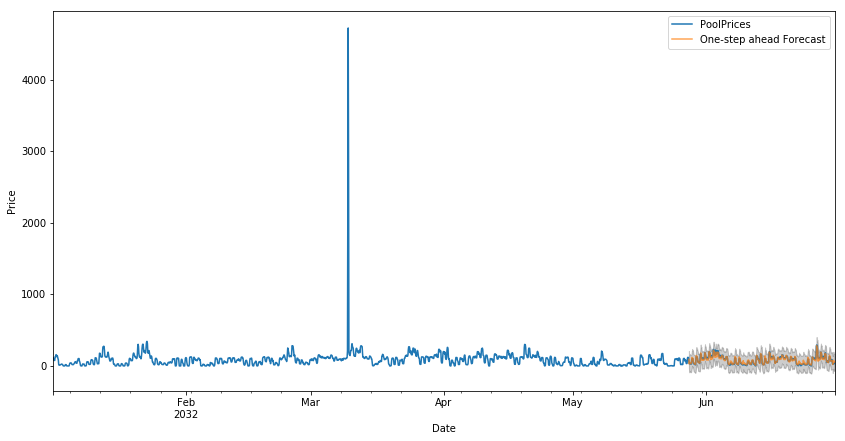

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2032-05-28 01:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = data['2032':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

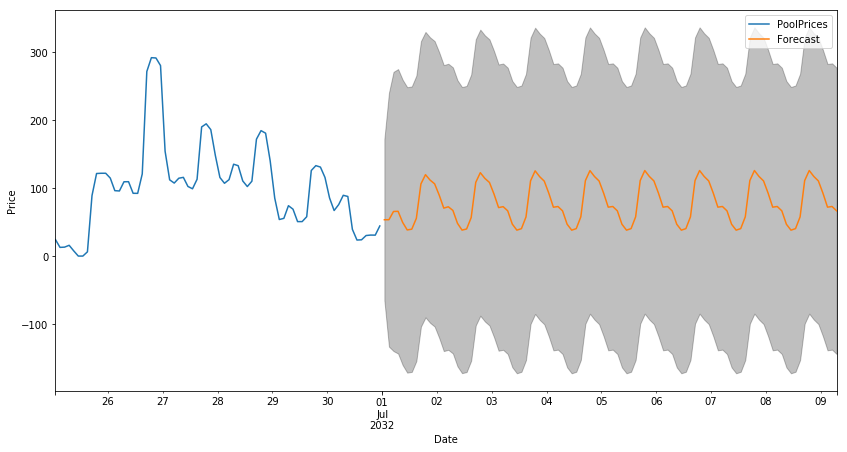

In [17]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = data['2032-06-25':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()